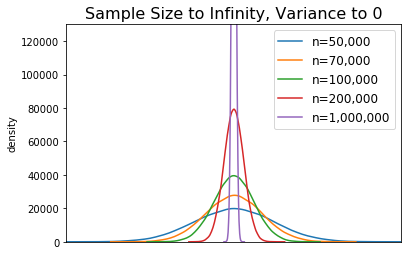

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Shows shrinking variance with realized samples
X = np.random.normal(0, 1, 1000000)
sample_sizes = [50000, 70000, 100000, 200000, 1000000]

plt.title('Sample Size to Infinity, Variance to 0', fontsize=16)
plt.ylabel('density')
for n in sample_sizes:
    sample = X[:n]
    sns.kdeplot(sample / n, label=f'n={n:,}')
plt.ylim(0, 130000)
plt.xlim(-.000085, 0.000085)
plt.tick_params(
    which='both',
    bottom=False,
    top=False,
    labelbottom=False
)
plt.yticks()
plt.legend(fontsize=12)

plt.show()

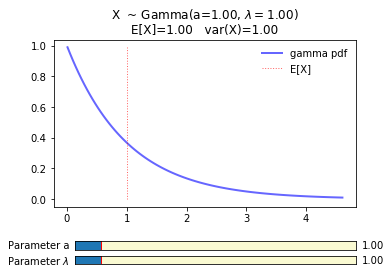

In [1]:
    import numpy as np    
    import matplotlib.pyplot as plt
    from matplotlib.widgets import Slider
    from scipy.stats import gamma

    # The probability density function for gamma is:
    # gamma.pdf(x, a) = lambda**a * x**(a-1) * exp(-lambda*x) / gamma(a)
    # The scale parameter is equal to scale = 1.0 / lambda.
    # https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.gamma.html

    # Init distribution
    a = 1.0
    b = 1.0
    rv = gamma(a, scale=1.0/b)
    mean, var, skew, kurt = rv.stats(moments='mvsk')
    # Init plot distribution
    fig, ax = plt.subplots(1, 1)
    plt.subplots_adjust(left=0.20, bottom=0.30)  # makes room for the widgets
    x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 100)
    y = np.linspace(0, max(rv.pdf(x)), 100)
    lin_pdf, = ax.plot(x, rv.pdf(x), 'b-', lw=2, alpha=0.6, label='gamma pdf')
    lin_mean, = ax.plot(mean*np.ones(100), y, 'r:', lw=1, alpha=0.6, label='E[X]')
    ax.set_title('X  ~ Gamma(a={:2.2f}, '.format(a)+r'$\lambda=$'+'{:2.2f})\nE[X]={:2.2f}   var(X)={:2.2f}'.format(b, mean, var))
    ax.legend(loc='best', frameon=False)
    # Init Sliders
    axcolor = 'lightgoldenrodyellow'
    axa = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
    axb = plt.axes([0.25, 0.10, 0.65, 0.03], facecolor=axcolor)
    slider_a = Slider(axa, 'Parameter a', 0.1, 10, valinit=a)
    slider_b = Slider(axb, 'Parameter $\lambda$', 0.1, 10, valinit=b)


    def update_plot(val):
        new_a = slider_a.val
        new_b = slider_b.val
        new_rv = gamma(new_a, scale=1.0 / new_b)
        new_mean, new_var, new_skew, new_kurt = new_rv.stats(moments='mvsk')
        new_x = np.linspace(new_rv.ppf(0.01), new_rv.ppf(0.99), 100)
        new_y = np.linspace(0, max(new_rv.pdf(new_x)), 100)
        lin_pdf.set_data(new_x, new_rv.pdf(new_x))
        lin_mean.set_data(new_mean * np.ones(100), new_y)
        ax.set_title('X  ~ Gamma(a={:2.2f}, '.format(new_a) + r'$\lambda=$' + '{:2.2f})\nE[X]={:2.2f}   var(X)={:2.2f}'.format(new_b, new_mean, new_var))
        ax.set_xlim([new_rv.ppf(0.01), new_rv.ppf(0.99)])
        ax.set_ylim([0, 1.05*max(new_rv.pdf(new_x))])


    slider_a.on_changed(update_plot)
    slider_b.on_changed(update_plot)

    plt.show()